In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_circle(center, radius, color='maroon', num_points=500):
    theta = np.linspace(0, 2*np.pi, num_points)
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)
    plt.plot(x, y, color=color)

In [3]:
fetch_california_housing = datasets.fetch_california_housing()
X = pd.DataFrame(data=fetch_california_housing.data,
                 columns=fetch_california_housing.feature_names)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Elbow method

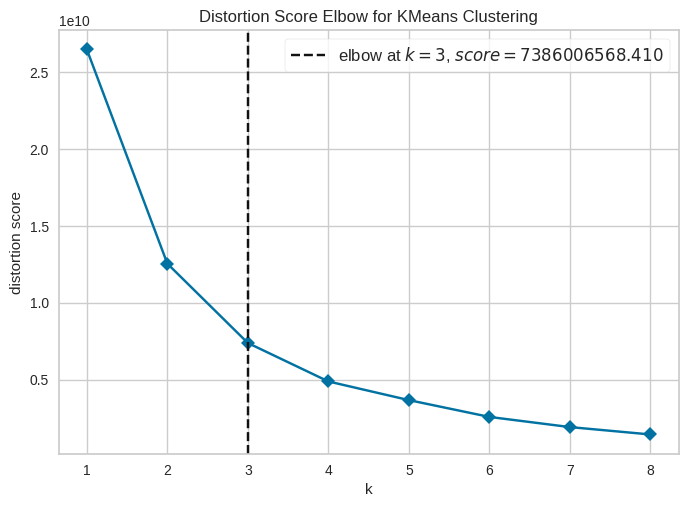

In [4]:
# Instantiate the KMeans model
model = KMeans()

# Use the KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(model, k=(1, 8+1), metric='distortion', timings=False)

# Fit the data to the visualizer
visualizer.fit(X)

# Visualize the elbow plot
visualizer.show()

plt.show()

In [5]:
columns=X.columns.values
k = 3
pca=PCA(n_components=k)
pca.fit(X)
pca_values=pca.components_
pca.components_

array([[ 8.11734515e-06, -3.29264421e-03, -1.57754708e-04,
        -2.77006684e-05,  9.99994324e-01,  6.40764448e-04,
        -2.05179008e-04,  1.76522227e-04],
       [-1.98005360e-02,  9.92216370e-01, -3.90115135e-02,
        -4.23881026e-03,  3.18858393e-03,  1.15585346e-01,
        -3.52344718e-03, -1.38634158e-02],
       [ 6.72539368e-03, -1.15291475e-01,  6.39521503e-03,
         6.14252568e-04, -1.01475721e-03,  9.93283105e-01,
         2.74984532e-03,  1.20467341e-03]])

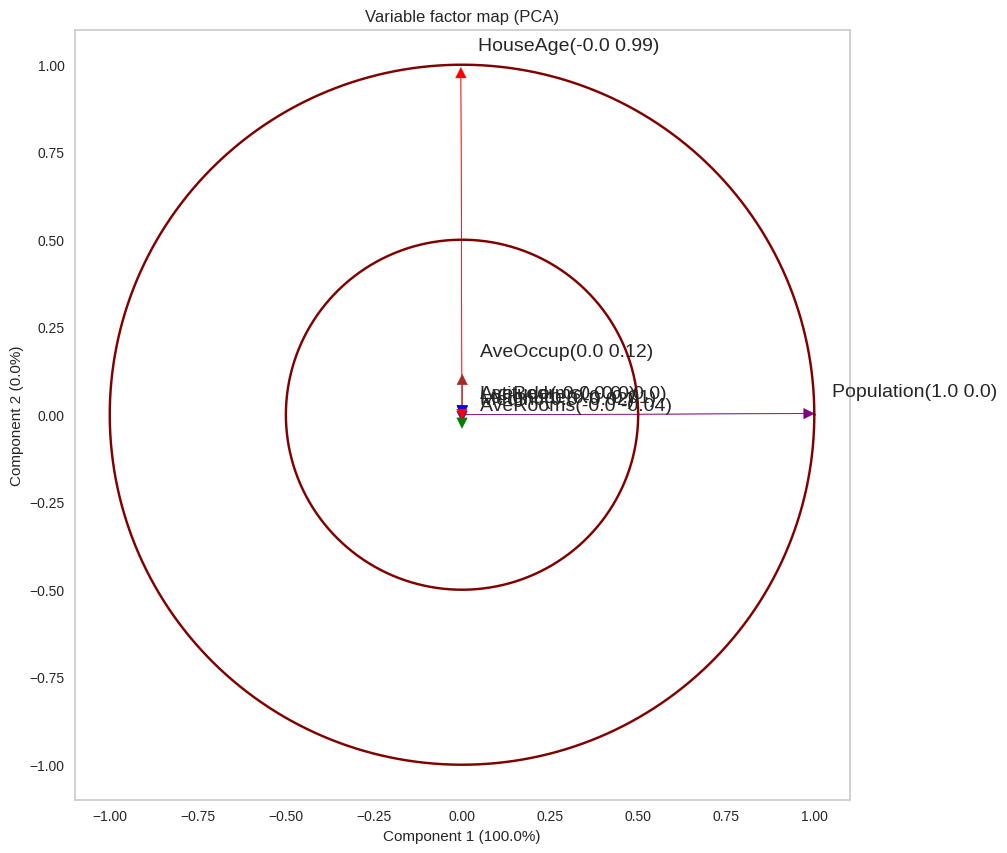

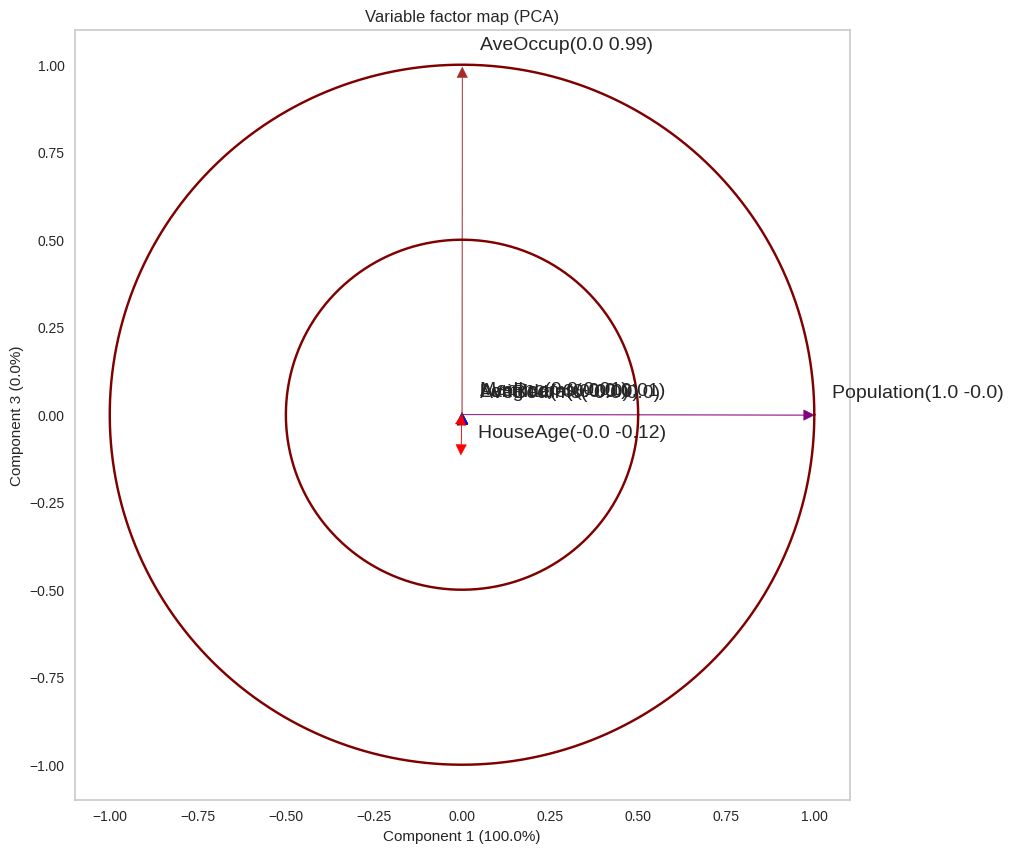

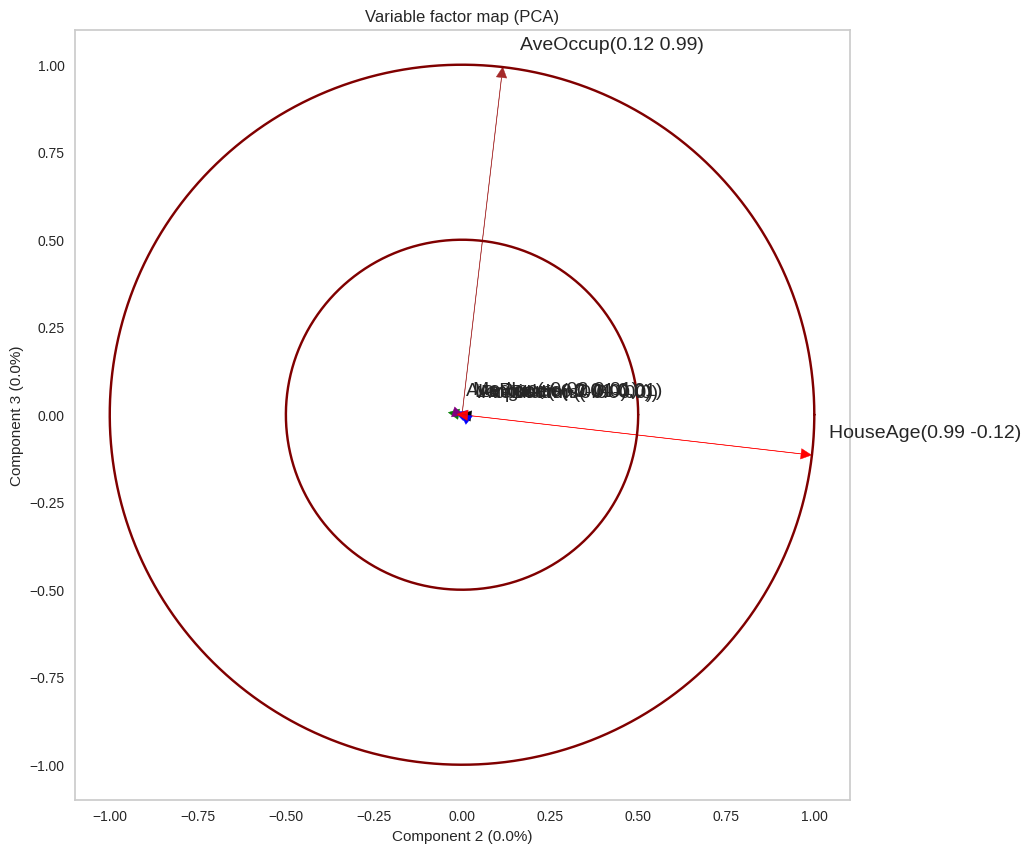

In [6]:
column_combinations = list(combinations(range(k), 2))
contribution = [round(i, 2) * 100 for i in pca.explained_variance_ratio_]

for combination in column_combinations:
    i, j = combination
    plt.figure(figsize=(10,10))
    plt.rcParams.update({'font.size': 14})
    # Plot the larger circle
    plot_circle(center=(0, 0), radius=1)
    # Plot the smaller circle
    plot_circle(center=(0, 0), radius=0.5)
    # Plot grid
    plt.grid()
    #Define color list
    colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
    if len(pca_values[0]) > 6:
        colors=colors*(int(len(pca_values[0])/6)+1)
    add_string=""
    for idx in range(len(pca_values[0])):
        xi=pca_values[i][idx]
        yi=pca_values[j][idx]
        plt.arrow(0, 0, 
                  dx=xi,
                  dy=yi, 
                  head_width=0.03,
                  head_length=0.03, 
                  color=colors[idx],
                  length_includes_head=True)
        add_string=f"({round(xi,2)} {round(yi,2)})"
        plt.text(xi + 0.05, 
                 yi + 0.05,
                 s=X.columns.values[idx] + add_string)
        plt.xlabel(f"Component {i+1} ({contribution[i]}%)")
        plt.ylabel(f"Component {j+1} ({contribution[j]}%)")
        plt.title('Variable factor map (PCA)')

Mean Absolute Difference

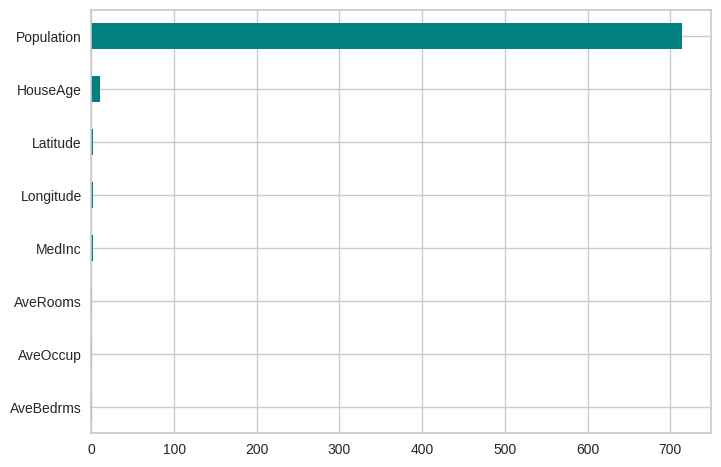

In [13]:
# Calculate the Mean Absolute Difference
mean_absolute_difference = np.sum(np.abs(X - np.mean(X,
                                                     axis=0)),
                                                     axis=0) / X.shape[0]
# Sort by the most important feature
mean_absolute_difference = mean_absolute_difference.sort_values()
# Plot result
mean_absolute_difference.plot(kind="barh", color="teal")
plt.show()

The PCA Perceptual Map as well as The Mean Absulte Difference show us that the most important variable is `Population`

In [14]:
X.loc[:,["Population"]]

,Population
0,322.0
1,2401.0
2,496.0
3,558.0
4,565.0
...,...
20635,845.0
20636,356.0
20637,1007.0
20638,741.0
